Mouse as a Paint-Brush

In [1]:
import cv2

events = [i for i in dir(cv2) if 'EVENT' in i]
print (events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [5]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)


In [6]:
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
#Adding Text to Images:
font = cv2.FONT_HERSHEY_SIMPLEX

while(1):
    dsp = img.copy()
    cv2.putText(img,'OpenCV ('+str(ix)+','+str(iy)+')' ,(10,40), font, 1, (255,255,255), 2, cv2.LINE_AA)
    cv2.imshow('image', dsp)
    
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
    
cv2.destroyAllWindows()

## Changing Colorspaces


Changing Color-space


In [1]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)


['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

Object Tracking

In [6]:
import cv2
import numpy as np

#video file name #파이썬 파일과 같은 경로에 저장
cap = cv2.VideoCapture("tracking2.avi")

while(1):
    # Take each frame #동영상 
    ret, frame = cap.read()

    if ret: 
        # Convert BGR to HSV # HSV color model 
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # define range of blue color in HSV
        lower_blue = np.array([40,50,50])   #40, 50, 50 -> yellow 
        upper_blue = np.array([80,255,255]) #80, 255, 255 -> yellow
        
        # Threshold the HSV image to get only blue colors #
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame, frame, mask= mask)
        cv2.imshow('frame', frame)
        cv2.imshow('mask', mask)
        cv2.imshow('res', res)
    
    else : 
        break

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

How to find HSV values to track?


In [7]:
# find the HSV value of Green
# [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively
green = np.uint8([[[0,255,0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


## Image Thresholding


Simple Thresholding

cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

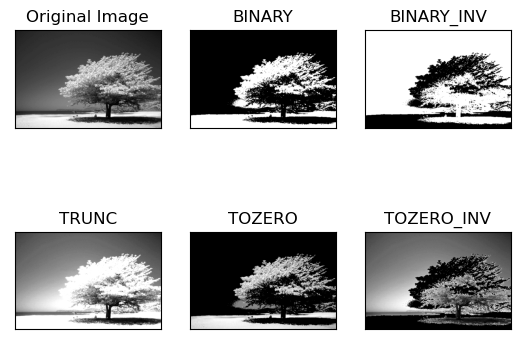

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gtree.jpg',0) # gray.png  # gray1.png
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Adaptive Thresholding


Adaptive Method - It decides how thresholding value is calculated. (임계값을 계산하는 방법)

cv2.ADAPTIVE_THRESH_MEAN_C 

: threshold value is the mean of neighbourhood area


cv2.ADAPTIVE_THRESH_GAUSSIAN_C 

: threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

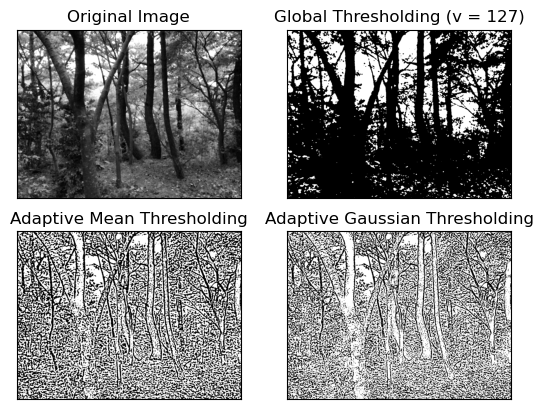

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sIMG_2177.jpg',0) #sIMG_2168.jpg
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY) #흑백

th2 = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C,\
    cv2.THRESH_BINARY, 11, 3) #이웃면적의 평균값에서 상수를 뺀 값

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
    cv2.THRESH_BINARY, 11, 3) #이웃값의 가우스 가중치 합에서 상수를 뺀 값

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


Otsu’s Binarization


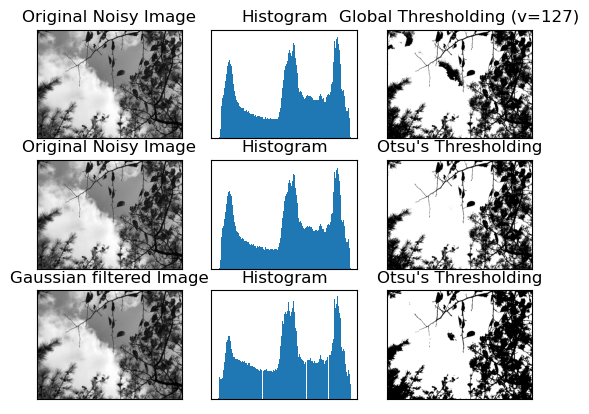

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sIMG_2180.jpg',0)
#cv2.imwrite('gsIMG_2180.jpg', gray)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, 
img, 0, th2,
blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

How Otsu’s Binarization Works?


In [39]:
img = cv2.imread('sIMG_2180.jpg', 0)
blur = cv2.GaussianBlur(img,(5,5), 0)
cv2.imwrite('bsIMG_2180.jpg', blur)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur], [0], None, [256], [0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1, p2 = np.hsplit(hist_norm, [i]) # probabilities
    q1, q2 = Q[i], Q[255]-Q[i] # cum sum of classes
    b1, b2 = np.hsplit(bins, [i]) # weights
    
    # finding means and variances
    m1, m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1, v2 = np.sum(((b1-m1)**2)*p1)/q1, np.sum(((b2-m2)**2)*p2)/q2
    
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
        print(thresh, fn_min)

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh, ret)


4 543903.2873498315
5 543693.1755024813
6 541971.1362378169
7 538207.9902151418
8 534258.8150353702
9 530865.5119623702
10 527407.0822276468
11 524192.5851637834
12 520986.961898224
13 517684.9111405533
14 513653.01932399144
15 509209.8846397536
16 503951.3176884797
17 498344.4592928761
18 492002.0408139602
19 485140.41348962986
20 477073.59078866814
21 468710.6078163581
22 460213.38878206734
23 451606.5404488737
24 442620.1855773772
25 433445.7722066165
26 424384.06257791916
27 415848.81117925077
28 407548.3303802134
29 400006.6752781456
30 392929.80643091287
31 386253.73686540994
32 379833.0759060244
33 373623.6880174139
34 367879.2328907009
35 362412.5144723902
36 356794.4682872105
37 351680.1526208367
38 346436.8278252684
39 341499.8729833033
40 336337.6021940238
41 331325.7746167188
42 326382.12549247063
43 321586.4862813983
44 316871.2321406445
45 312196.49956500216
46 307566.6985252812
47 303045.37510629726
48 298420.4997842859
49 294151.1733858313
50 289883.61054061394
51 28558

C:\Users\U301-17\AppData\Local\Temp\ipykernel_4432\1434838266.py:21: RuntimeWarning: invalid value encountered in double_scalars
  m1, m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\U301-17\AppData\Local\Temp\ipykernel_4432\1434838266.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  m1, m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\U301-17\AppData\Local\Temp\ipykernel_4432\1434838266.py:22: RuntimeWarning: invalid value encountered in multiply
  v1, v2 = np.sum(((b1-m1)**2)*p1)/q1, np.sum(((b2-m2)**2)*p2)/q2
